In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0dfe93a86a30c9964afe2abe671dda4b


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chapais
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | makakilo city
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
Processing Record 16 of Set 1 | calbuco
Processing Record 17 of Set 1 | kapoeta
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | krasnoselkup
Processing Record 20 of Set 1 | katobu
Processing Record 21 of Set 1 | jamestown
Processing 

Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | miranorte
City not found. Skipping...
Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | pangnirtung
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | point fortin
Processing Record 46 of Set 4 | mora
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | saint-louis
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | farafangana
Processing Record 2 of Set 5 | grand gaube
Processing Record 3 of Set 5 | burica
City not found. Skipping...
Processing Record 4 of Set 5 | bury saint edmunds
City not found. Skipping...
Processing Record 5 of Set 5 | richards bay
Processing Record 6 of Set 5 | port augusta
Processing Record 7 of Set 5 | marrakesh
Processing Record 8 of Set 5 | touros


City not found. Skipping...
Processing Record 28 of Set 8 | hirara
Processing Record 29 of Set 8 | ulaangom
Processing Record 30 of Set 8 | yate
Processing Record 31 of Set 8 | shingu
Processing Record 32 of Set 8 | katangli
Processing Record 33 of Set 8 | uribia
Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | sergeyevka
Processing Record 36 of Set 8 | vertou
Processing Record 37 of Set 8 | dossor
Processing Record 38 of Set 8 | ballina
Processing Record 39 of Set 8 | bara
Processing Record 40 of Set 8 | acarau
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | kommunisticheskiy
Processing Record 43 of Set 8 | cesme
Processing Record 44 of Set 8 | nouakchott
Processing Record 45 of Set 8 | bubaque
Processing Record 46 of Set 8 | salalah
Processing Record 47 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 48 of Set 8 | alta floresta
Processing Record 49 of Set 8 | manokwari
Processing Record 50 of Set 8 | kirk

Processing Record 16 of Set 12 | dinghai
Processing Record 17 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 18 of Set 12 | saint-joseph
Processing Record 19 of Set 12 | murgab
Processing Record 20 of Set 12 | fairview
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | buchanan
Processing Record 23 of Set 12 | contai
Processing Record 24 of Set 12 | sibolga
Processing Record 25 of Set 12 | dover
Processing Record 26 of Set 12 | leningradskiy
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | grand forks
Processing Record 29 of Set 12 | bagrami
Processing Record 30 of Set 12 | sorland
Processing Record 31 of Set 12 | san pedro
Processing Record 32 of Set 12 | monrovia
Processing Record 33 of Set 12 | havoysund
Processing Record 34 of Set 12 | tianpeng
Processing Record 35 of Set 12 | ukhta
Processing Record 36 of Set 12 | svetlyy
Processing Record 37 of Set 12 | ostrovnoy
Processing Record 38 of Set 12 | antofagasta


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,8.38,87,100,12.21,CA,2022-03-27 20:57:00
1,Provideniya,64.3833,-173.3000,15.91,73,0,4.47,RU,2022-03-27 20:48:02
2,Bredasdorp,-34.5322,20.0403,64.99,81,38,2.71,ZA,2022-03-27 20:48:00
3,Hermanus,-34.4187,19.2345,68.81,67,97,3.98,ZA,2022-03-27 20:52:51
4,Makakilo City,21.3469,-158.0858,77.29,72,100,3.44,US,2022-03-27 20:54:58


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chapais,CA,2022-03-27 20:57:00,49.7834,-74.8492,8.38,87,100,12.21
1,Provideniya,RU,2022-03-27 20:48:02,64.3833,-173.3000,15.91,73,0,4.47
2,Bredasdorp,ZA,2022-03-27 20:48:00,-34.5322,20.0403,64.99,81,38,2.71
3,Hermanus,ZA,2022-03-27 20:52:51,-34.4187,19.2345,68.81,67,97,3.98
4,Makakilo City,US,2022-03-27 20:54:58,21.3469,-158.0858,77.29,72,100,3.44


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1648418531.6442943

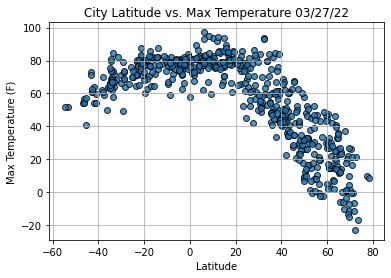

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

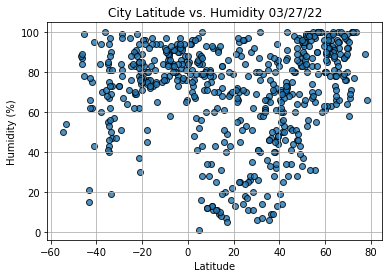

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

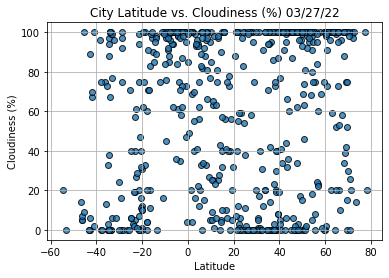

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

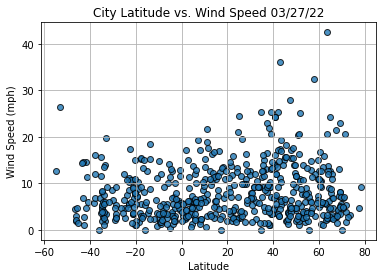

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()